In [12]:
# Function to take care of teh translation and windowing. 
def window_image(img, window_center,window_width, intercept, slope, rescale=True):
    img = (img*slope +intercept) #for translation adjustments given in the dicom file. 
    img_min = window_center - window_width//2 #minimum HU level
    img_max = window_center + window_width//2 #maximum HU level
    img[img<img_min] = img_min #set img_min for all HU levels less than minimum HU level
    img[img>img_max] = img_max #set img_max for all HU levels higher than maximum HU level
    if rescale: 
        img = (img - img_min) / (img_max - img_min)*255.0 
    return img
    
def get_first_of_dicom_field_as_int(x):
    #get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == pydicom.multival.MultiValue: return int(x[0])
    else: return int(x)
    
def get_windowing(data):
    dicom_fields = [data[('0028','1050')].value, #window center
                    data[('0028','1051')].value, #window width
                    data[('0028','1052')].value, #intercept
                    data[('0028','1053')].value] #slope
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]

In [13]:
import pydicom
import matplotlib.pyplot as plt

DCM_PATH="/home/nqr5356/Desktop/SP_project/data/RSNA/train_images/1.2.826.0.1.3680043.10041/1.dcm"


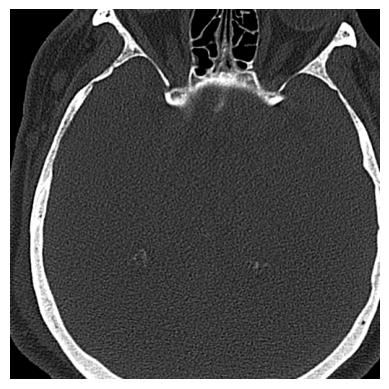

In [30]:
data = pydicom.dcmread(DCM_PATH)
image = data.pixel_array
window_center , window_width, intercept, slope = get_windowing(data)
output = window_image(image, window_center, window_width, intercept, slope, rescale = False)
plt.axis('off')
plt.imshow(output, cmap='gray')

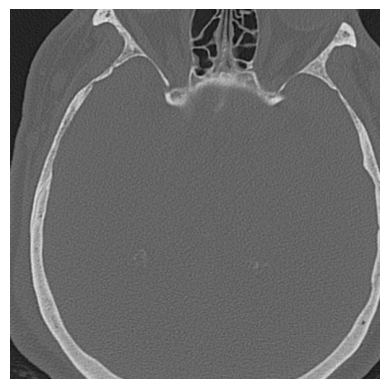

In [31]:
plt.axis('off')
plt.imshow(image, cmap='gray')